In [116]:
import os
os.chdir(r'C:\Users\Krittamate\เดสก์ท็อป\year3term2\Data analytic')
os.getcwd()

'C:\\Users\\Krittamate\\เดสก์ท็อป\\year3term2\\Data analytic'

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [118]:
df=pd.read_csv('adult.csv')

# A

In [119]:
cate_vars = df.select_dtypes(include=['object', 'category'])
cont_vars = df.select_dtypes(exclude=['object', 'category'])


print("categorical:")
print(cate_vars.columns)

print("continuous:")
print(cont_vars.columns)

categorical:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
continuous:
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


# B

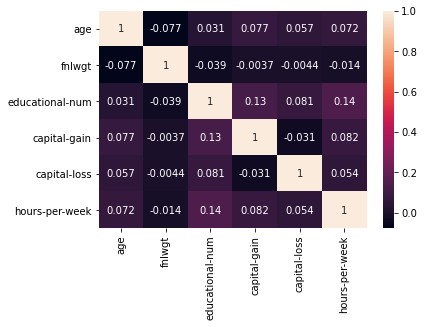

In [120]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

# C

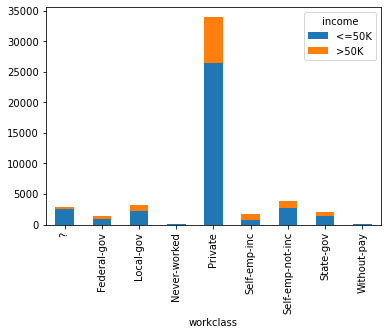

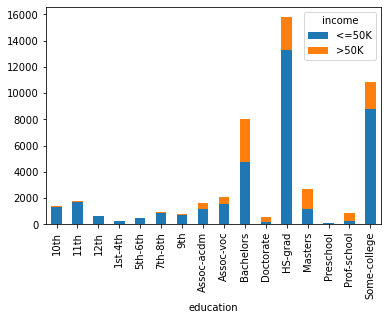

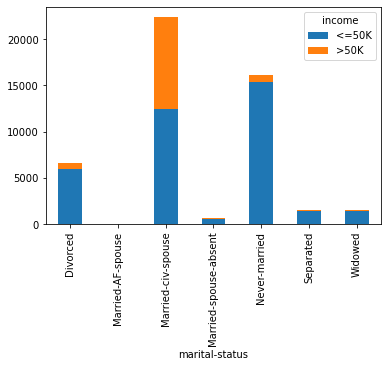

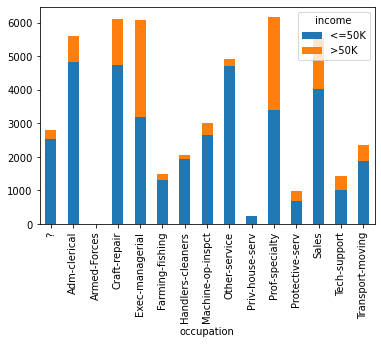

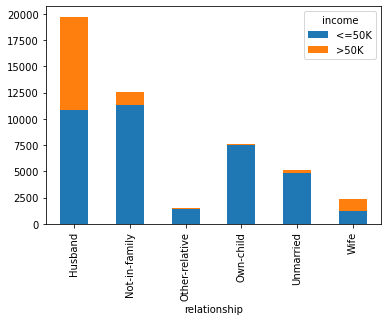

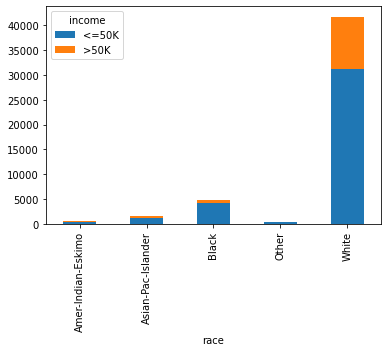

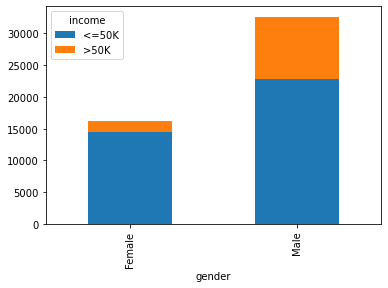

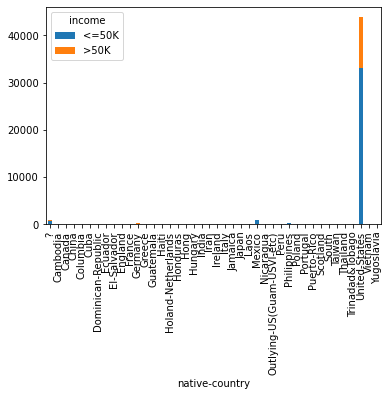

In [121]:
categorical_variables = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]
target_variable = "income"

for var in categorical_variables:
    grouped = df.groupby([var, target_variable]).size().reset_index(name='counts')
    pivot = grouped.pivot(index=var, columns=target_variable, values='counts')
    pivot.plot(kind='bar', stacked=True)
    plt.show()

# D

In [122]:
df.replace("?", float("NaN"), inplace=True)

print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


# E

In [123]:
numerical_vars = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
df[numerical_vars].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# F

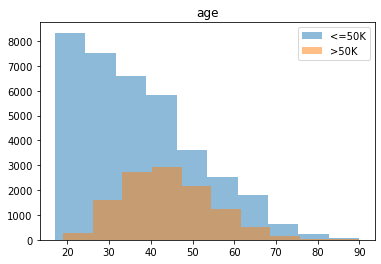

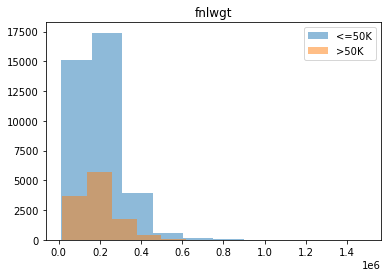

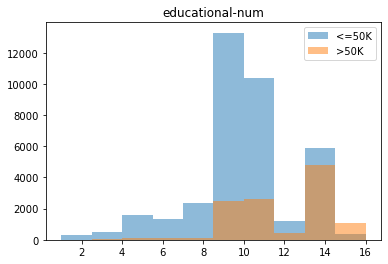

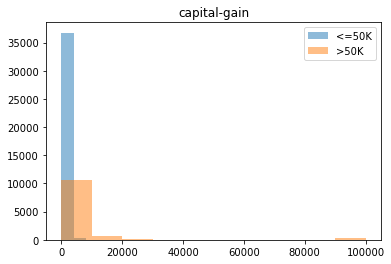

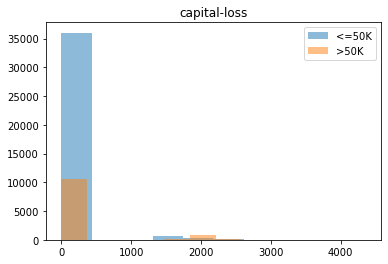

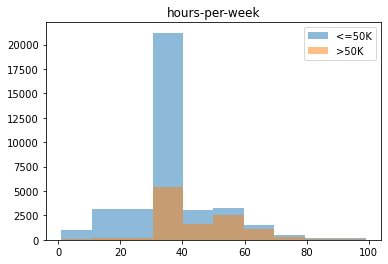

In [124]:
df=pd.read_csv('adult.csv')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

for col in ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]:
    plt.hist(df[df['income'] == 0][col], alpha=0.5, label='<=50K')
    plt.hist(df[df['income'] == 1][col], alpha=0.5, label='>50K')
    plt.legend()
    plt.title(col)
    plt.show()

# G

<Figure size 1440x1440 with 0 Axes>

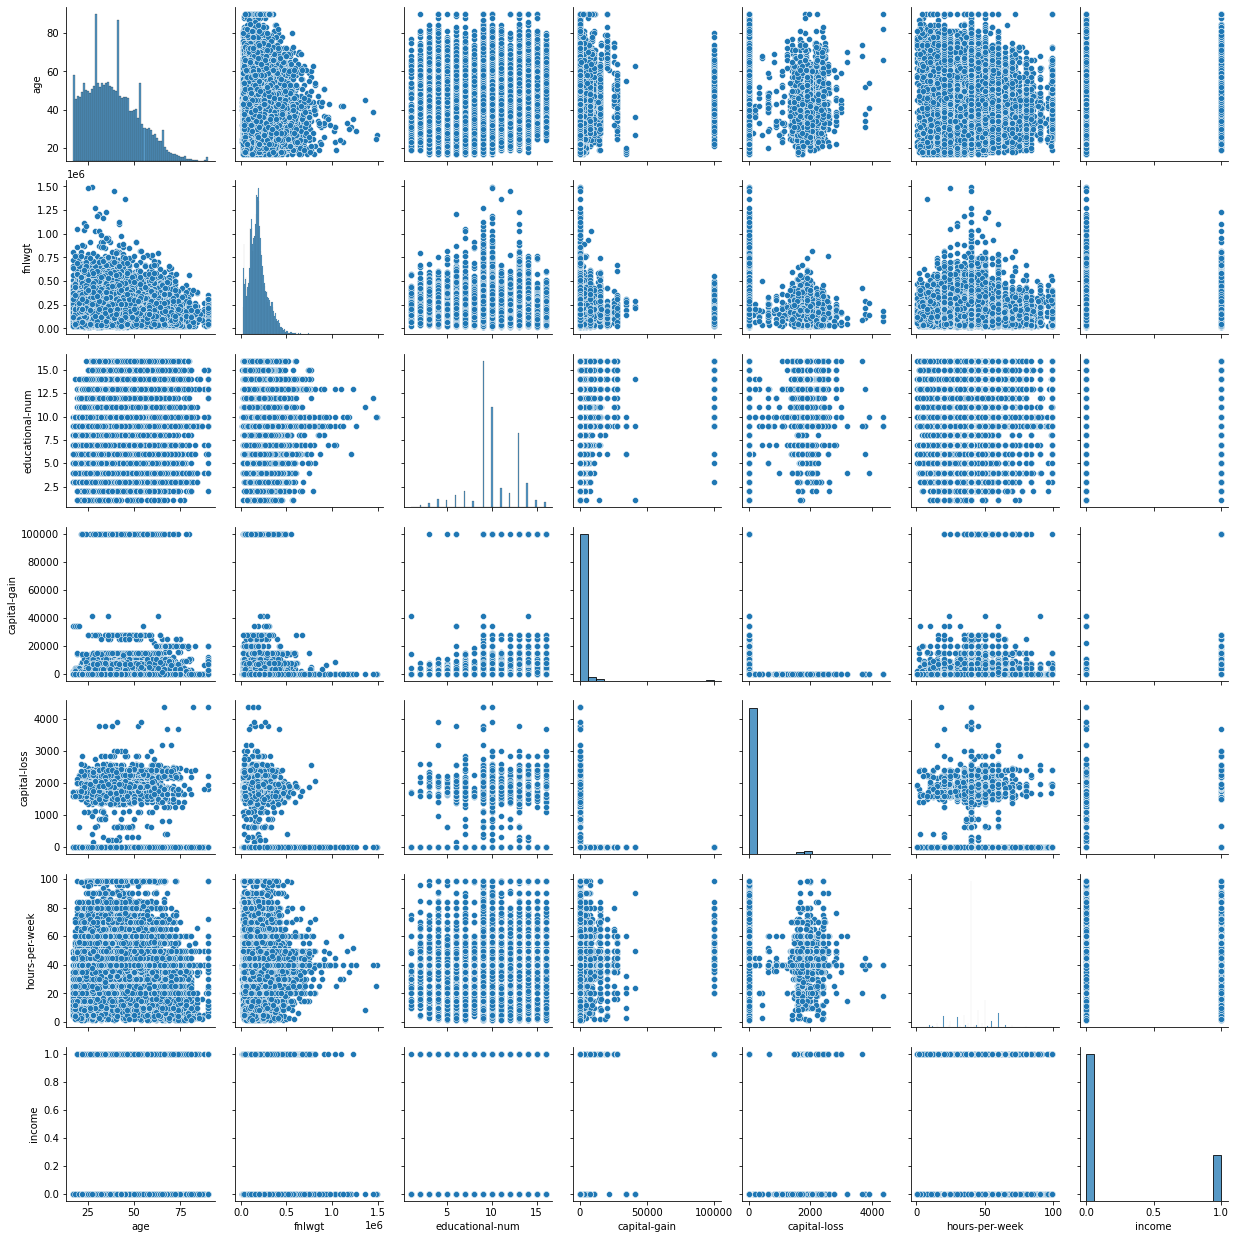

In [125]:
plt.figure(figsize=(20,20))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

# Explore my dataset

In [126]:
dataset=pd.read_csv('movie_data.csv')
## print shape of dataset with rows and columns
print(dataset.shape)

(1000, 7)


In [127]:
## print the top5 records
dataset.head()

,Title,Genre,Director,Year,Runtime,Rating,Votes
0,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074
1,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820
2,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606
3,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545
4,Suicide Squad,Action,David Ayer,2016,123,6.2,393727


# Missing Values

In [128]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

From the above dataset some of the features like Id is not required

In [129]:
print("Rating of movies {}".format(len(dataset.Rating)))

Rating of movies 1000


# Numerical Variables

In [130]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  4


,Year,Runtime,Rating,Votes
0,2014,121,8.1,757074
1,2012,124,7.0,485820
2,2016,117,7.3,157606
3,2016,108,7.2,60545
4,2016,123,6.2,393727


# Target Variables

In [131]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Year' in feature]

year_feature

['Year']

In [132]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

Year [2014 2012 2016 2015 2007 2011 2008 2006 2009 2010 2013]


Text(0.5, 1.0, 'Rating vs Year')

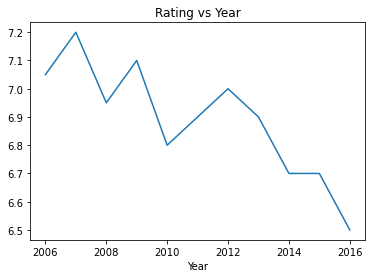

In [133]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year and rating

dataset.groupby('Year')['Rating'].median().plot()
plt.xlabel('Year')
plt.title("Rating vs Year")


# Continuous Variable

In [134]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


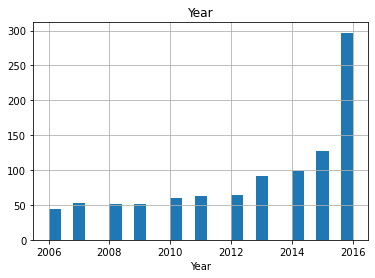

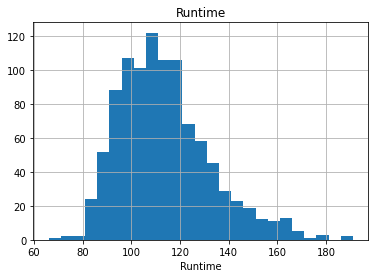

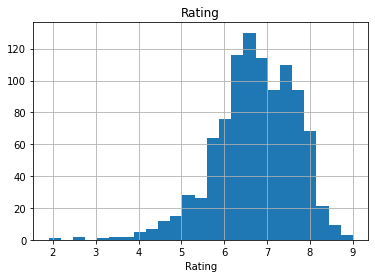

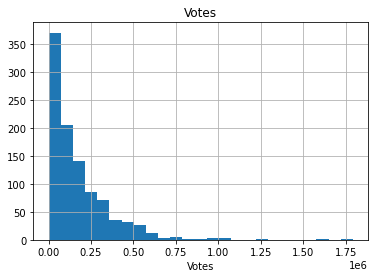

In [135]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()


### Categorical Variables

In [136]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Title', 'Genre', 'Director']

In [137]:
dataset[categorical_features].head()

,Title,Genre,Director
0,Guardians of the Galaxy,Action,James Gunn
1,Prometheus,Adventure,Ridley Scott
2,Split,Horror,M. Night Shyamalan
3,Sing,Animation,Christophe Lourdelet
4,Suicide Squad,Action,David Ayer


In [138]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Title and number of categories are 999
The feature is Genre and number of categories are 13
The feature is Director and number of categories are 644


## Find out the relationship between categorical variable and dependent feature Rating

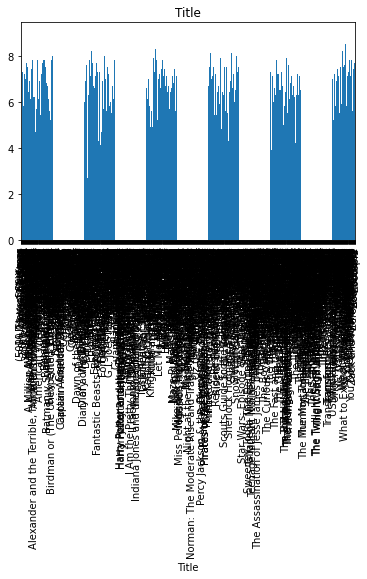

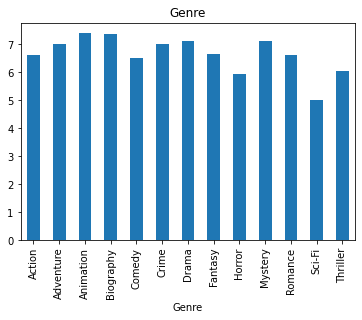

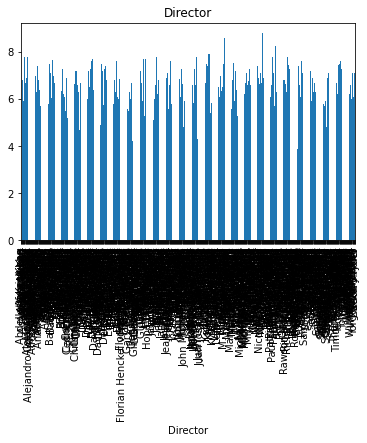

In [139]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Rating'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()